1704
1704
dict_keys(['assemble', 'asari', 'blank_masking', 'drop_samples', 'drop_outliers', 'normalize', 'drop_missing_features', 'impute', 'log_transform', 'build_empCpds', 'map_ms2', 'l4_annotate', 'l2_annotate', 'l1b_annotate', 'l1a_annotate', 'report', 'finish'])
assemble 0.019163497289021808
asari 23.787551852067313
blank_masking 1.6185418486595153
drop_samples 1.1739463686943055
drop_outliers 0.8513699173927307
normalize 0.9965308308601379
drop_missing_features 0.15929365158081055
impute 0.17307191689809162
log_transform 0.1556544820467631
build_empCpds 0.31053061882654825
map_ms2 1.2607966462771099
l4_annotate 0.42823566993077594
l2_annotate 2.608411419391632
l1b_annotate 0.21616997718811035
l1a_annotate 0.8900832692782085
report 1.4521435976028443
dict_keys(['assemble', 'asari', 'blank_masking', 'drop_samples', 'drop_outliers', 'normalize', 'drop_missing_features', 'impute', 'log_transform', 'build_empCpds', 'map_ms2', 'l4_annotate', 'l2_annotate', 'l1b_annotate', 'l1a_annotate

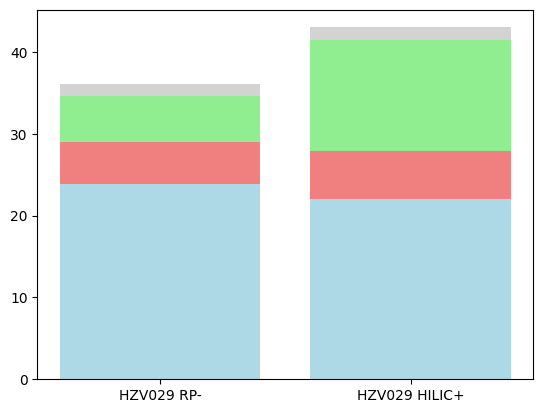

In [5]:
# Panel B
import json
import matplotlib.pyplot as plt
rpneg = json.load(open("./HZV029_plasma_RP_neg_experiment.json"))
hilicpos = json.load(open("./HZV029_plasma_HILIC_pos_experiment.json"))

print(len(rpneg["acquisitions"]))
print(len(hilicpos["acquisitions"]))

for title, data in zip(["HZV029 RP-", "HZV029 HILIC+"], [rpneg, hilicpos]):
    cmds = data["command_history"]
    total_time_elapsed = {}
    for i, cmd_1 in enumerate(cmds[:-1]):
        cmd_2 = cmds[i+1]
        time_1, cmd_1 = cmd_1.split(":")
        time_2, cmd_2 = cmd_2.split(":")
        subcommand = cmd_2.split(";")[1]
        time_used = float(time_2) - float(time_1)
        if subcommand not in total_time_elapsed:
            total_time_elapsed[subcommand] = 0
        total_time_elapsed[subcommand] += time_used / 60
    print(total_time_elapsed.keys())
    colors = {
        'assemble': 'lightblue',
        'asari': 'lightblue',
        'convert': 'lightblue',
        'blank_masking': 'lightcoral',
        'drop_samples': 'lightcoral',
        'drop_outliers': 'lightcoral',
        'drop_missing_features': 'lightcoral',
        'normalize': 'lightcoral',
        'batch_correct': 'lightcoral', 
        'log_transform': 'lightcoral',
        'interpolate': 'lightcoral',
        'impute': 'lightcoral',
        'build_empCpds': 'lightgreen',
        'l4_annotate': 'lightgreen',
        'l2_annotate': 'lightgreen',
        'L1_annotate_w_MS2': 'lightgreen',
        'map_ms2': 'lightgreen',
        'l1a_annotate': 'lightgreen',
        'l1b_annotate': 'lightgreen',
        'report': 'lightgray',
        'finish': 'lightgreen'
    }


    subtotal = 0
    for sub, dt in total_time_elapsed.items():
        if sub not in {'finish'}:
            plt.bar(title, dt, bottom=subtotal, color=colors[sub])
            subtotal += dt
            print(sub, dt)
plt.show()
